In [20]:
#Predicting TEY using ambient variables as features, with the help of Neural network.
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [21]:
data = pd.read_csv("C:\\Users\\deepa\\Downloads\\gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [22]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [12]:
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


C:\Users\deepa\AppData\Local\Temp\ipykernel_1788\312138321.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TEY'])


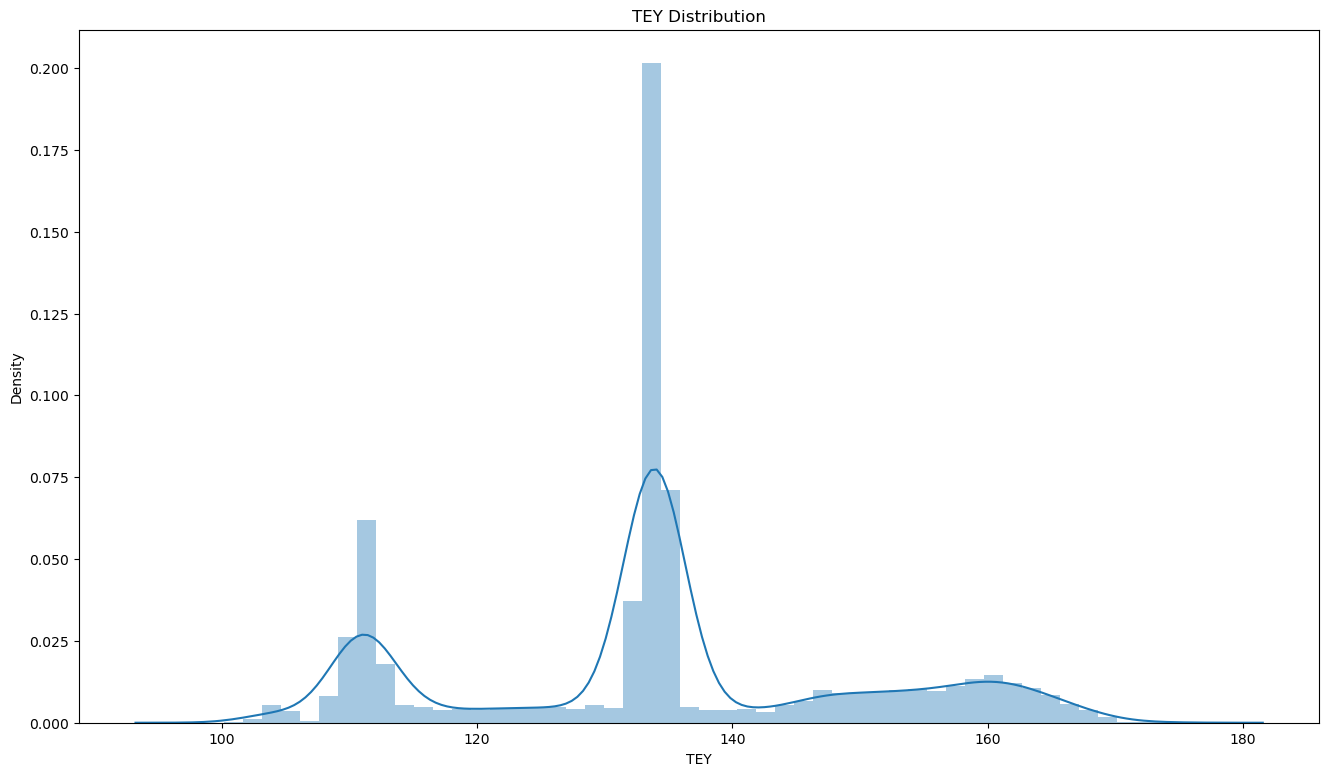

In [24]:
#distribution of each feature
plt.figure(figsize =(16,9))
sns.distplot(data['TEY'])
plt.title('TEY Distribution')
plt.show()

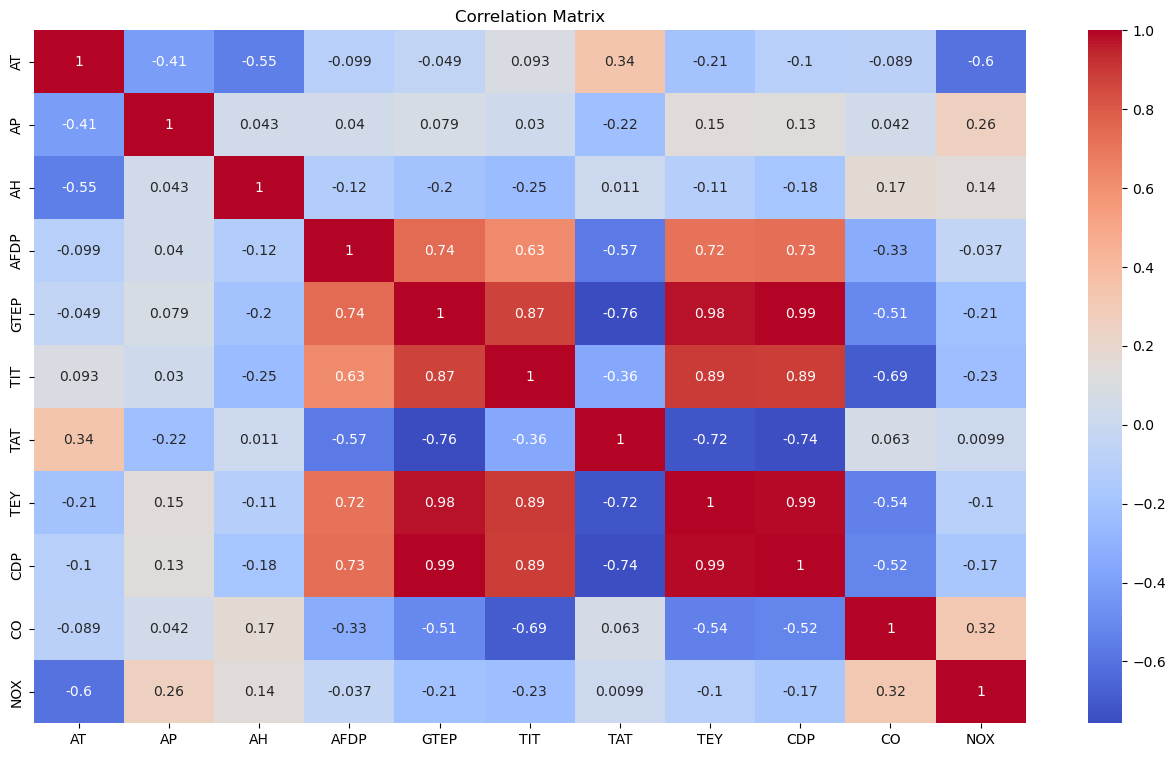

In [26]:
#Correlation matrix to see the relationships between each variable
plt.figure(figsize =(16,9))
corr = data.corr()
snb.heatmap(corr,cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

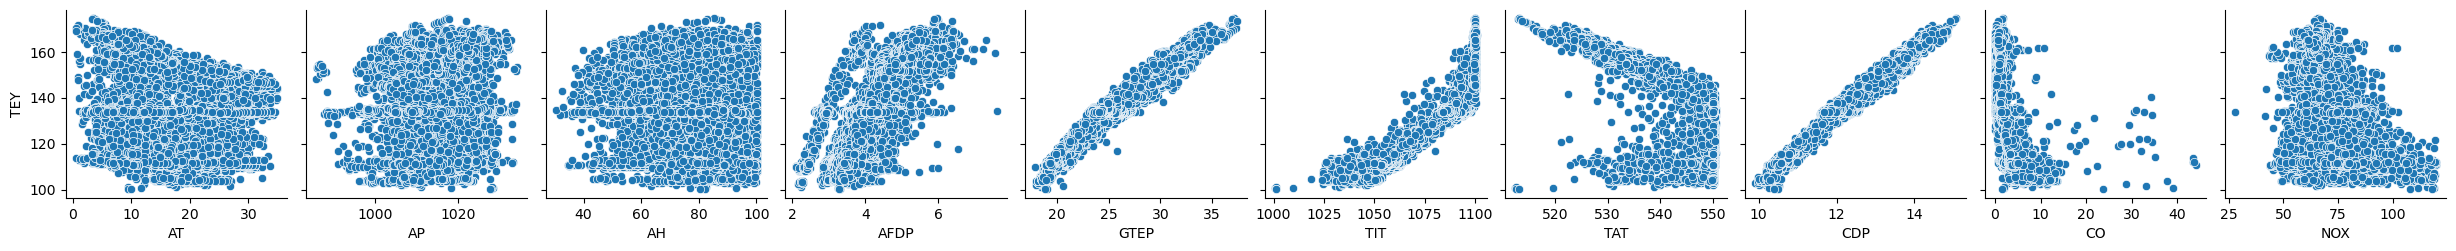

In [28]:
snb.pairplot(data, x_vars=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX'], y_vars=['TEY'])
plt.show()

In [30]:
#Split the dataset into training and testing sets
X = data.drop('TEY', axis=1)
y = data['TEY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
#Train neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
376/376 [==============================] - 4s 6ms/step - loss: 88.0197 - val_loss: 23.1373
Epoch 2/100
376/376 [==============================] - 1s 4ms/step - loss: 11.0476 - val_loss: 16.1495
Epoch 3/100
376/376 [==============================] - 1s 4ms/step - loss: 4.4358 - val_loss: 2.2649
Epoch 4/100
376/376 [==============================] - 2s 4ms/step - loss: 2.8321 - val_loss: 2.5846
Epoch 5/100
376/376 [==============================] - 1s 4ms/step - loss: 2.2161 - val_loss: 2.3122
Epoch 6/100
376/376 [==============================] - 2s 4ms/step - loss: 2.0954 - val_loss: 1.1976
Epoch 7/100
376/376 [==============================] - 2s 5ms/step - loss: 2.2245 - val_loss: 1.4290
Epoch 8/100
376/376 [==============================] - 2s 5ms/step - loss: 2.2030 - val_loss: 0.8777
Epoch 9/100
376/376 [==============================] - 2s 6ms/step - loss: 2.2040 - val_loss: 1.0131
Epoch 10/100
376/376 [==============================] - 2s 6ms/step - loss: 2.1087 - va

376/376 [==============================] - 2s 6ms/step - loss: 1.3610 - val_loss: 2.6591
Epoch 82/100
376/376 [==============================] - 2s 5ms/step - loss: 0.9272 - val_loss: 1.3307
Epoch 83/100
376/376 [==============================] - 2s 6ms/step - loss: 0.9752 - val_loss: 1.0489
Epoch 84/100
376/376 [==============================] - 2s 5ms/step - loss: 0.8895 - val_loss: 0.5274
Epoch 85/100
376/376 [==============================] - 2s 4ms/step - loss: 0.9352 - val_loss: 0.5764
Epoch 86/100
376/376 [==============================] - 2s 4ms/step - loss: 0.9382 - val_loss: 0.5783
Epoch 87/100
376/376 [==============================] - 2s 5ms/step - loss: 0.9997 - val_loss: 0.5011
Epoch 88/100
376/376 [==============================] - 2s 5ms/step - loss: 1.0785 - val_loss: 0.5330
Epoch 89/100
376/376 [==============================] - 2s 5ms/step - loss: 1.2789 - val_loss: 0.6645
Epoch 90/100
376/376 [==============================] - 2s 5ms/step - loss: 0.7898 - val_loss: 

In [36]:
#Evaluate model
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

94/94 [==============================] - 0s 2ms/step
Mean squared error: 0.791611358435807


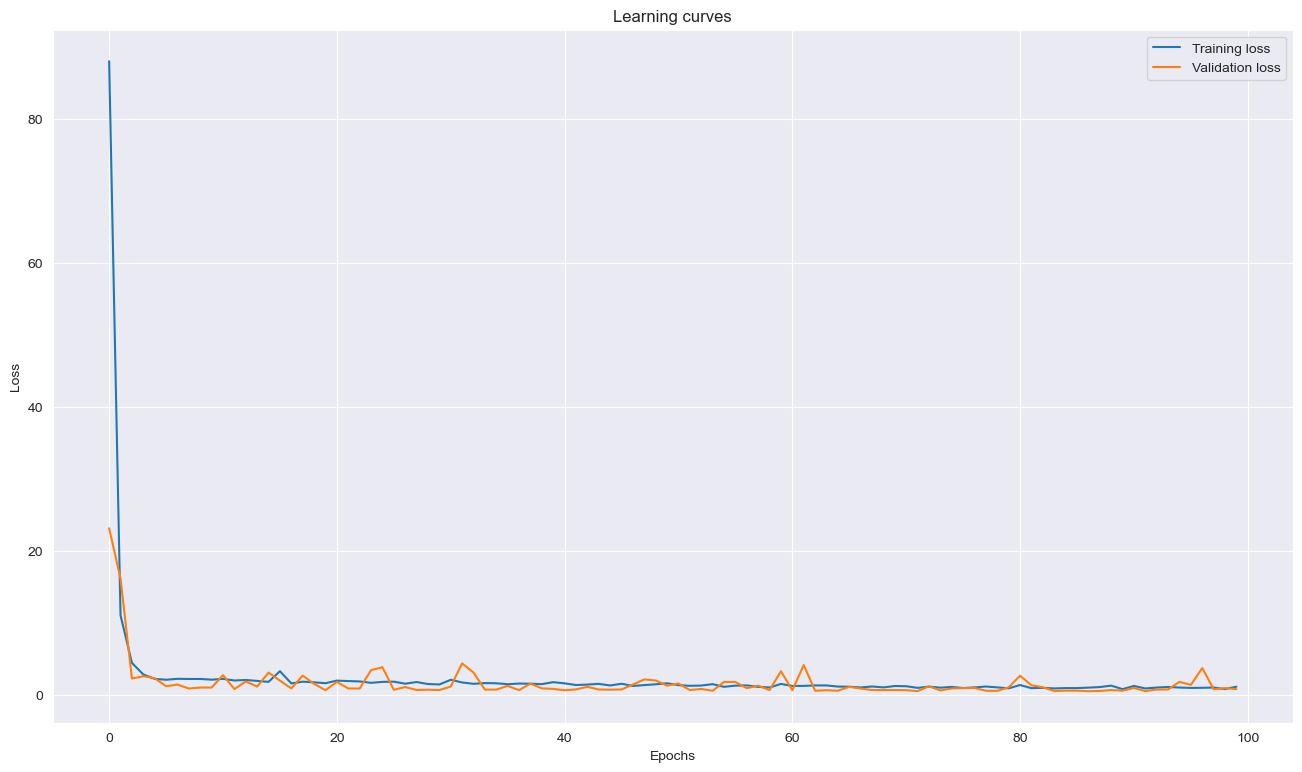

In [37]:
#Plot the learning curves
snb.set_style('darkgrid')
plt.figure(figsize=(16, 9))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Learning curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
#Make a prediction for new data points
new_data = np.array([6.23, 985.85, 24.08, 2.09, 17.70, 1000.85, 511.04, 9.85, 30.00, 25.90]).reshape(1, -1)
tey_pred = model.predict(new_data)
print('Predicted TEY:', tey_pred[0][0])

1/1 [==============================] - 0s 53ms/step
Predicted TEY: 111.91643


In [16]:
#end

array([[ 1230,   292, 12092, ..., 10695, 10885,     0],
       [ 1199,   297, 12149, ..., 10775, 10892,     0],
       [ 1251,   301, 11882, ..., 10746, 10835,     0],
       ...,
       [ 1433,   276, 12533, ..., 12818, 11571,     0],
       [ 1302,   281, 12449, ..., 12579, 11636,     0],
       [ 1266,   285, 12227, ..., 12087, 11620,     0]], dtype=int64)

AttributeError: module 'tensorflow.python.distribute.input_lib' has no attribute 'DistributedDatasetInterface'